# The Spark Foundation
# Data science and Business analytics intern (GRIP June 22)
# Name: Arnab De 
## Prediction using Unsupervised ML 

In [6]:
import pandas as pd
df = pd.read_csv("E:\python\data set\IRIS.csv")

In [7]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [8]:
df.shape

(150, 5)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [10]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [12]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [13]:
x = df.iloc[:, 2:4].values
y = df.iloc[:,-1].values

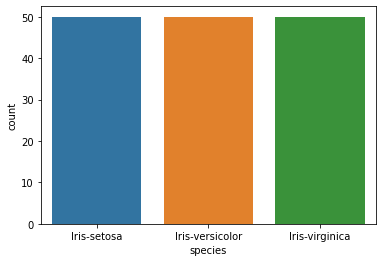

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt


sns.countplot(x='species', data=df, )
plt.show()

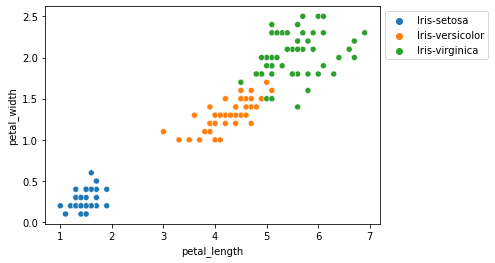

In [15]:
import seaborn as sns 
import matplotlib.pyplot as plt
sns.scatterplot(x = 'petal_length', y = 'petal_width', hue = 'species', data = df)
plt.legend(bbox_to_anchor=(1,1), loc = 2)
plt.show()

In [16]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 100, n_init = 10, random_state = 0)



In [17]:
y_km = km.fit_predict(x)
print(km.cluster_centers_)

[[1.464      0.244     ]
 [5.59583333 2.0375    ]
 [4.26923077 1.34230769]]


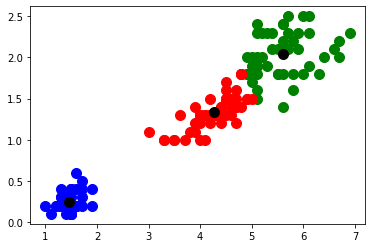

In [18]:
plt.scatter(x[y_km == 0, 0], x[y_km == 0, 1],s = 100, c = 'blue', label = 'Iris-setosa')
plt.scatter(x[y_km == 1, 0], x[y_km == 1, 1],s = 100, c = 'green', label = 'Iris-versicolour')
plt.scatter(x[y_km == 2, 0], x[y_km == 2, 1],s = 100, c = 'red', label = 'Iris-virginica')

plt.scatter(km.cluster_centers_[:,   0], km.cluster_centers_[:,1],s = 100, c = 'black', label = 'Centroids')   

C:\Users\ARNAB\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


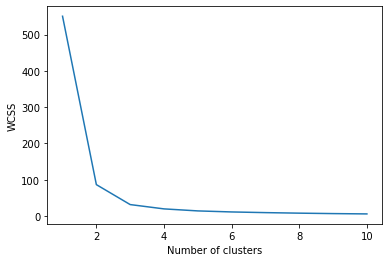

In [19]:
from sklearn.cluster import KMeans
wcss = []
for i in range (1, 11): 
    kmeans = KMeans (n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()